![](https://images.pexels.com/photos/3768126/pexels-photo-3768126.jpeg?auto=compress&cs=tinysrgb&dpr=2&w=500)

# RK4

Kevin J. Walchko, Phd

19 Apr 2020

[![](https://camo.githubusercontent.com/e170e276291254896665fa8f612b99fe5b7dd005/68747470733a2f2f692e6372656174697665636f6d6d6f6e732e6f72672f6c2f62792d73612f342e302f38387833312e706e67)](https://creativecommons.org/licenses/by-sa/4.0/)

---

The most widely known member of the Runge–Kutta family is generally referred to as "RK4", the "classic Runge–Kutta method" or simply as "the Runge–Kutta method". Let an initial value problem be specified as follows:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

Here $y$ is an unknown function (scalar or vector) of time $t$, which we would like to approximate; we are told that $\frac{dy}{dt}$, the rate at which $y$ changes, is a function of $t$ and of $y$ itself. At the initial time $t_0$ the corresponding $y$ value is $y_0$. The function $f$ and the initial conditions $t_0$, $y_0$ are given.

Now pick a step-size $h \gt 0$ and define

$$
\begin{align}
y_{n+1} &= y_n + \frac{1}{6}h\left(k_1 + 2k_2 + 2k_3 + k_4 \right),\\
t_{n+1} &= t_n + h \\
\end{align}
$$

for $n$ = 0, 1, 2, 3, ..., using

$$
\begin{align}
 k_1 &= \ f(t_n, y_n), \\
 k_2 &= \ f\left(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2}\right), \\ 
 k_3 &= \ f\left(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2}\right), \\
 k_4 &= \ f\left(t_n + h, y_n + hk_3\right).
\end{align}
$$

where

- $k_{1}$ is the slope at the beginning of the interval, using $y$ (Euler's method)
- $k_{2}$ is the slope at the midpoint of the interval, using $y$ and $k_{1}$
- $k_{3}$ is again the slope at the midpoint, but now using $y$ and $k_{2}$
- $k_{4}$ is the slope at the end of the interval, using $y$ and $k_{3}$

## References

- Wikipedia: [Runge-Kutta Methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi, cos, sin

import attr

In [2]:
@attr.s(slots=True)
class RK4:
    """
    Implements a Runge-Kutta 4 as explained here:
    https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

    f - function(t, y, u)
    where:
        t - time
        y - state
        u - control force
    """

    func = attr.ib()

    def solve(self, y, h, t_end):
        """
        Given a function, initial conditions, step size and end value, this will
        calculate an unforced system. The default start time is t=0.0, but this
        can be changed.

        y - initial state
        h - step size
        n - stop time
        """
        ts = []
        ys = []
        yi = y
        ti = 0.0
        while ti < t_end:
            ts.append(ti)
            yi = self.step(yi, None, ti, h)
            ys.append(yi)
            ti += h
        return ts, ys

    def step(self, y, u, t, h):
        """
        This is called by solve, but can be called by the user who wants to
        run through an integration with a control force.

        y - state at t
        u - control inputs at t
        t - time
        h - step size
        """
        k1 = h * self.func(t, y, u)
        k2 = h * self.func(t + .5*h, y + .5*h*k1, u)
        k3 = h * self.func(t + .5*h, y + .5*h*k2, u)
        k4 = h * self.func(t + h, y + h*k3, u)
        return y + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    def __call__(self, y, u, t, h):
        """Alternative to calling step()"""
        return self.step(y, u, t, h)


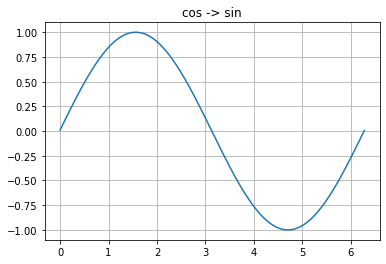

In [3]:
rk = RK4(lambda t, y, u: cos(t))
y = 0.0
t, y = rk.solve(y, 0.01, 2.0*pi)


plt.plot(t, y)
plt.title("cos -> sin")
plt.grid(True)

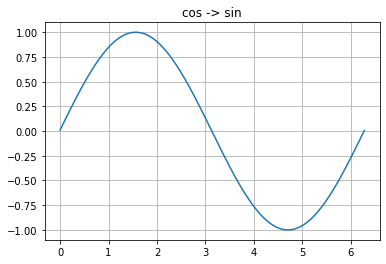

In [4]:
rk = RK4(lambda t, y, u: cos(t))
y = 0.0
t = 0.0
step = 0.01
sy = []
st = []
while t <= 2.0*pi:
    y = rk(y, None, t, step)
    
    # save data
    sy.append(y)
    st.append(t)
    
    t += step # increment time
    
plt.plot(st, sy)
plt.title("cos -> sin")
plt.grid(True)